# Quantum State Transfer

## based on https://journals.aps.org/prresearch/abstract/10.1103/PhysRevResearch.3.023038

In [ ]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, QuantumRegister, ClassicalRegister, execute, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# from ibm_quantum_widgets import *
import qiskit.quantum_info as qi
from qiskit.extensions import Initialize
# from qiskit_textbook.tools import random_state
from qiskit.quantum_info import partial_trace, Statevector

from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.quantum_info import partial_trace, Statevector
import matplotlib.pyplot as plt
import random
from qiskit.providers.aer import AerSimulator
import qiskit.quantum_info as qi

In [2]:
from qiskit import IBMQ
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-education', group='iit-madras-1', project='quantum-computin')

## QASM Simulator

In [3]:
# device = provider.get_backend('ibmq_bogota')
device = Aer.get_backend('qasm_simulator')

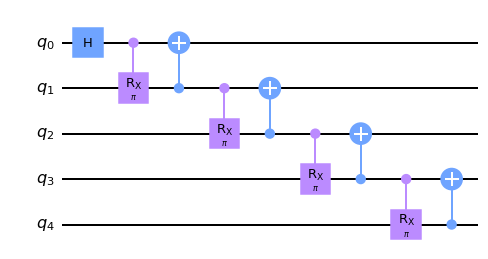

In [4]:
qc = QuantumCircuit(5)

# qc.cx(1,0)
qc.h(0)
qc.crx(np.pi, 0,1)
qc.cx(1,0)
# qc.cx(2,1)
qc.crx(np.pi, 1,2)
qc.cx(2,1)
# qc.cx(3,2)
qc.crx(np.pi, 2,3)
qc.cx(3,2)
qc.crx(np.pi, 3,4)
qc.cx(4,3)
# qc.measure(4, 0)
qc.draw('mpl')

In [5]:
backend = Aer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()
outputstate = result.get_statevector(qc)
print(outputstate)

[ 7.07106781e-01+1.57009246e-16j  1.34015774e-16+3.92523115e-17j
  3.92523115e-17-1.34015774e-16j  5.33686624e-49-1.71786938e-48j
 -1.34015774e-16-3.92523115e-17j -1.71786938e-48-5.33686624e-49j
  1.72395178e-49-1.34067481e-48j  2.03282732e-49-3.24334241e-50j
 -3.92523115e-17+1.34015774e-16j -5.33686624e-49+1.71786938e-48j
 -1.45303429e-48-1.97837519e-49j -4.76292272e-50-1.64002937e-49j
 -1.88896268e-49-7.63074566e-49j -2.40951686e-49-2.03490366e-49j
 -6.38940785e-49+6.98393852e-49j -7.26290547e-82+4.17578529e-81j
  7.07106781e-01+4.87209703e-16j  9.61404352e-33+1.76607114e-48j
  2.02408843e-33+8.41228808e-33j -1.58609922e-33+7.07601872e-34j
 -7.21053264e-33+4.04817686e-33j -7.07601872e-34+1.49538869e-33j
  5.59843841e-33+3.11603408e-33j  2.13800404e-65-3.15628959e-66j
 -1.32926406e-32-6.00877720e-33j  2.86249331e-33-7.07601872e-34j
  4.94153568e-34+1.24055641e-33j  3.15628959e-66+2.13800404e-65j
 -2.86249331e-33+7.07601872e-34j -1.54817687e-65+1.31831508e-65j
  2.33515621e-65+7.801557

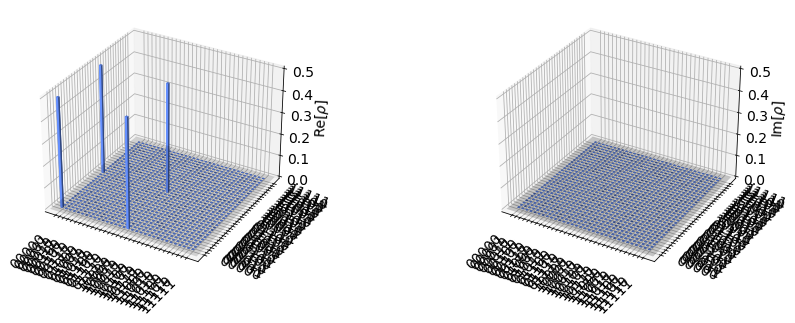

In [6]:
from qiskit.visualization import plot_state_city
plot_state_city(outputstate)

In [8]:
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
from qiskit.quantum_info import state_fidelity

In [9]:
qst_swap = state_tomography_circuits(qc, [0,1,2,3,4])
job = execute(qst_swap, Aer.get_backend('qasm_simulator'), shots=5000)
tomo_swap = StateTomographyFitter(job.result(), qst_swap)
rho_swap = tomo_swap.fit()
F_swap = state_fidelity(outputstate, rho_swap)
print('Fit Fidelity =', F_swap)

/Users/kabirkhanna/opt/anaconda3/envs/bosch_intern/lib/python3.7/site-packages/qiskit/ignis/verification/tomography/basis/circuits.py:468: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  prep += circuit
/Users/kabirkhanna/opt/anaconda3/envs/bosch_intern/lib/python3.7/site-packages/qiskit/circuit/quantumcircuit.py:876: DeprecationWarning: The QuantumCircuit.extend() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  return self.extend(rhs)
/Users/kabirkhanna/opt/anaconda3/envs/bosch_intern/lib/python3.7/site-packages/qiskit/ignis/verification/tomography/basis/circuits.py:478: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more 

Fit Fidelity = 0.9934944232530944


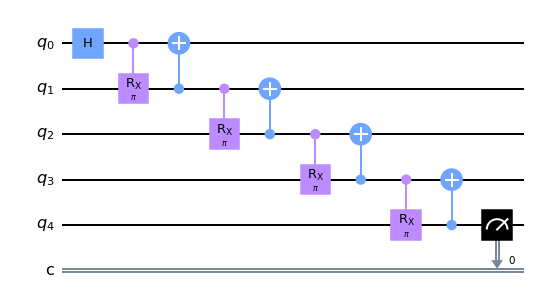

In [12]:
qc1 = QuantumCircuit(5,1)


qc1.h(0)
qc1.crx(np.pi, 0,1)
qc1.cx(1,0)
# qc.cx(2,1)
qc1.crx(np.pi, 1,2)
qc1.cx(2,1)
# qc.cx(3,2)
qc1.crx(np.pi, 2,3)
qc1.cx(3,2)
qc1.crx(np.pi, 3,4)
qc1.cx(4,3)
qc1.measure(4,0)
qc1.draw('mpl')


In [13]:
job = execute(qc1, device, shots = 1000000)

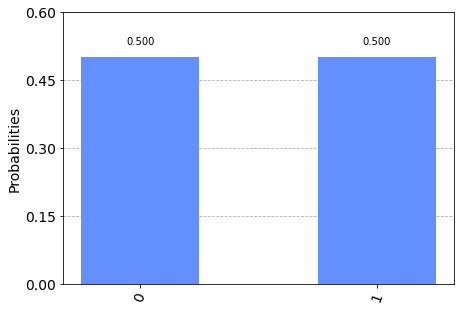

In [15]:
results = job.result()
answer = results.get_counts(qc1)
plot_histogram(answer)

## Linear Spin-Chain (ibmq_bogota)

In [16]:
device = provider.get_backend('ibmq_bogota')

t_qc = transpile(qst_swap, backend, optimization_level=3)
job = backend.run(t_qc)
job_monitor(job)
exp_result = job.result()
tomo_swap = StateTomographyFitter(job.result(), t_qc)
rho_swap = tomo_swap.fit()
F_swap = state_fidelity(outputstate, rho_swap)
print('Fit Fidelity =', F_swap)

Job Status: job has successfully run
Fit Fidelity = 0.5892040546170703


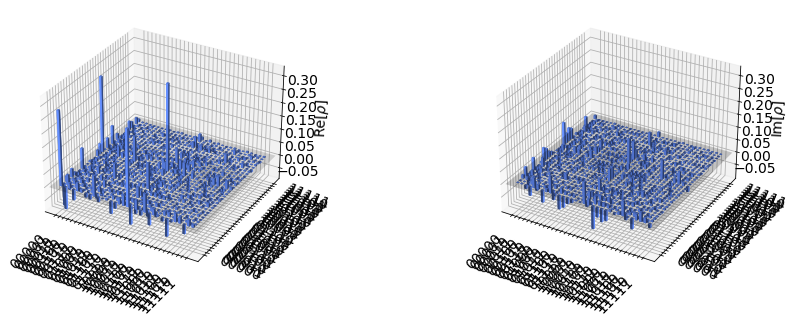

In [17]:
plot_state_city(rho_swap)

In [ ]:
transpiled_qc1 = transpile(qc1, device, optimization_level=3)
job = device.run(transpiled_qc1)
job_monitor(job)

Job Status: job is queued (1)

In [ ]:
results = job.result()
answer = results.get_counts(qc1)
plot_histogram(answer)

## Simulator with dephasing noise 

In [19]:
# Import from Qiskit Aer noise module
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise import QuantumError, ReadoutError
from qiskit.providers.aer.noise import pauli_error
from qiskit.providers.aer.noise import depolarizing_error
from qiskit.providers.aer.noise import thermal_relaxation_error

In [20]:
# T1 and T2 values for qubits 0-3
T1s = np.random.normal(1000e3, 10e3, 5) # Sampled from normal distribution mean 50 microsec
T2s = np.random.normal(110e-6, 5e-6, 5)  # Sampled from normal distribution mean 50 microsec

# Truncate random T2s <= T1s
T2s = np.array([min(T2s[j], 2 * T1s[j]) for j in range(5)])

# Instruction times (in nanoseconds)
time_u1 = 0   # virtual gate
time_u2 = 50  # (single X90 pulse)
time_u3 = 100 # (two X90 pulses)
time_cx = 300
time_reset = 1000  # 1 microsecond
time_measure = 1000 # 1 microsecond

# QuantumError objects
errors_reset = [thermal_relaxation_error(t1, t2, time_reset)
                for t1, t2 in zip(T1s, T2s)]
errors_measure = [thermal_relaxation_error(t1, t2, time_measure)
                  for t1, t2 in zip(T1s, T2s)]
errors_u1  = [thermal_relaxation_error(t1, t2, time_u1)
              for t1, t2 in zip(T1s, T2s)]
errors_u2  = [thermal_relaxation_error(t1, t2, time_u2)
              for t1, t2 in zip(T1s, T2s)]
errors_u3  = [thermal_relaxation_error(t1, t2, time_u3)
              for t1, t2 in zip(T1s, T2s)]
errors_cx = [[thermal_relaxation_error(t1a, t2a, time_cx).expand(
             thermal_relaxation_error(t1b, t2b, time_cx))
              for t1a, t2a in zip(T1s, T2s)]
               for t1b, t2b in zip(T1s, T2s)]

# Add errors to noise model
noise_thermal = NoiseModel()
for j in range(5):
    noise_thermal.add_quantum_error(errors_reset[j], "reset", [j])
    noise_thermal.add_quantum_error(errors_measure[j], "measure", [j])
    noise_thermal.add_quantum_error(errors_u1[j], "u1", [j])
    noise_thermal.add_quantum_error(errors_u2[j], "u2", [j])
    noise_thermal.add_quantum_error(errors_u3[j], "u3", [j])
    for k in range(5):
        noise_thermal.add_quantum_error(errors_cx[j][k], "cx", [j, k])

print(noise_thermal)

NoiseModel:
  Basis gates: ['cx', 'id', 'u2', 'u3']
  Instructions with noise: ['u2', 'reset', 'u3', 'measure', 'cx']
  Qubits with noise: [0, 1, 2, 3, 4]
  Specific qubit errors: [('reset', [0]), ('reset', [1]), ('reset', [2]), ('reset', [3]), ('reset', [4]), ('measure', [0]), ('measure', [1]), ('measure', [2]), ('measure', [3]), ('measure', [4]), ('u2', [0]), ('u2', [1]), ('u2', [2]), ('u2', [3]), ('u2', [4]), ('u3', [0]), ('u3', [1]), ('u3', [2]), ('u3', [3]), ('u3', [4]), ('cx', [0, 0]), ('cx', [0, 1]), ('cx', [0, 2]), ('cx', [0, 3]), ('cx', [0, 4]), ('cx', [1, 0]), ('cx', [1, 1]), ('cx', [1, 2]), ('cx', [1, 3]), ('cx', [1, 4]), ('cx', [2, 0]), ('cx', [2, 1]), ('cx', [2, 2]), ('cx', [2, 3]), ('cx', [2, 4]), ('cx', [3, 0]), ('cx', [3, 1]), ('cx', [3, 2]), ('cx', [3, 3]), ('cx', [3, 4]), ('cx', [4, 0]), ('cx', [4, 1]), ('cx', [4, 2]), ('cx', [4, 3]), ('cx', [4, 4])]


In [21]:
sim_thermal = AerSimulator(noise_model=noise_thermal)
t_qc = transpile(qst_swap, sim_thermal)
job = sim_thermal.run(t_qc)
job_monitor(job)
exp_result = job.result()
tomo_swap = StateTomographyFitter(job.result(), t_qc)
rho_swap = tomo_swap.fit()
F_swap = state_fidelity(outputstate, rho_swap)
print('Fit Fidelity =', F_swap)

Job Status: job has successfully run
Fit Fidelity = 0.031709849521924335


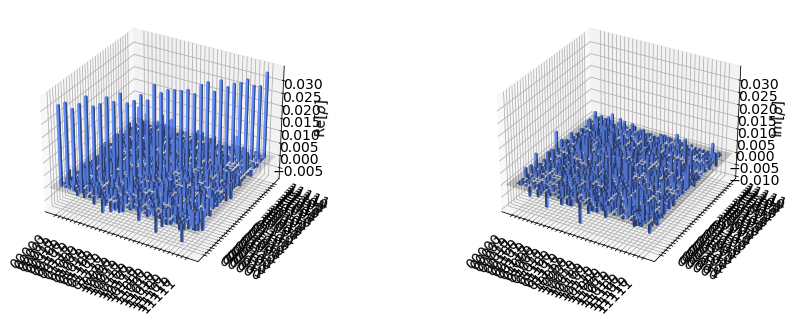

In [22]:
plot_state_city(rho_swap)

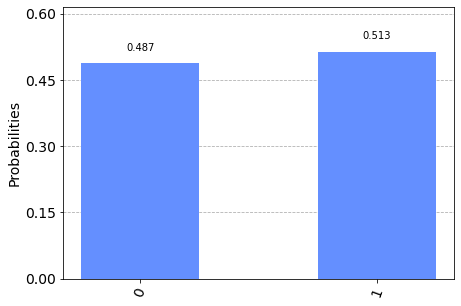

In [7]:
# Run the noisy simulation
sim_thermal = AerSimulator(noise_model=noise_thermal)

# Transpile circuit for noisy basis gates
circ_tthermal = transpile(qc, sim_thermal)

# Run and get counts
result_thermal = sim_thermal.run(circ_tthermal).result()
counts_thermal = result_thermal.get_counts(0)

# Plot noisy output
plot_histogram(counts_thermal)

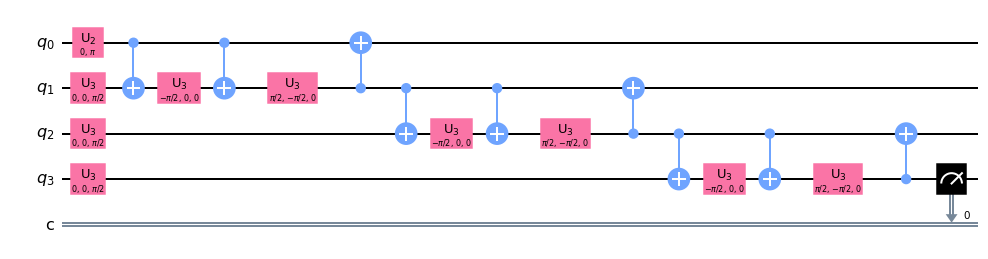

In [33]:
circ_tthermal.draw('mpl')

In [54]:
# Tomography functions
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
from qiskit.ignis.verification.tomography import process_tomography_circuits, ProcessTomographyFitter
from qiskit.ignis.verification.tomography import gateset_tomography_circuits, GatesetTomographyFitter
import qiskit.ignis.mitigation.measurement as mc

